# FasterRCNN

In [4]:
# We download the pre-trained checkpoints for inference and finetuning.
!wget -c https://download.openmmlab.com/mmdetection/v2.0/faster_rcnn/faster_rcnn_r50_caffe_fpn_mstrain_3x_coco/faster_rcnn_r50_caffe_fpn_mstrain_3x_coco_20210526_095054-1f77628b.pth \
      -O checkpoints/faster_rcnn_r50_caffe_fpn_mstrain_3x_coco_20210526_095054-1f77628b.pth

mkdir: cannot create directory ‘checkpoints’: File exists
--2022-11-01 12:41:23--  https://download.openmmlab.com/mmdetection/v2.0/faster_rcnn/faster_rcnn_r50_caffe_fpn_mstrain_3x_coco/faster_rcnn_r50_caffe_fpn_mstrain_3x_coco_20210526_095054-1f77628b.pth
Resolving download.openmmlab.com (download.openmmlab.com)... 47.102.71.233
Connecting to download.openmmlab.com (download.openmmlab.com)|47.102.71.233|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 167291982 (160M) [application/octet-stream]
Saving to: ‘checkpoints/faster_rcnn_r50_caffe_fpn_mstrain_3x_coco_20210526_095054-1f77628b.pth’

checkpoints/faster_ 100%[===================>] 159.54M  8.36MB/s    in 19s     

2022-11-01 12:41:42 (8.43 MB/s) - ‘checkpoints/faster_rcnn_r50_caffe_fpn_mstrain_3x_coco_20210526_095054-1f77628b.pth’ saved [167291982/167291982]



In [11]:
import mmcv
from mmcv.runner import load_checkpoint

from mmdet.apis import inference_detector, show_result_pyplot
from mmdet.models import build_detector

# Choose to use a config and initialize the detector
config = 'configs/faster_rcnn/faster_rcnn_r50_caffe_fpn_mstrain_3x_coco.py'
# Setup a checkpoint file to load
checkpoint = 'checkpoints/faster_rcnn_r50_caffe_fpn_mstrain_3x_coco_20210526_095054-1f77628b.pth'

# Set the device to be used for evaluation
device='cuda:1'

# Load the config
config = mmcv.Config.fromfile(config)
# Set pretrained to be None since we do not need pretrained model here
config.model.pretrained = None

# Initialize the detector
model = build_detector(config.model)

# Load checkpoint
checkpoint = load_checkpoint(model, checkpoint, map_location=device)

# Set the classes of models for inference
model.CLASSES = checkpoint['meta']['CLASSES']

# We need to set the model's cfg for inference
model.cfg = config

# Convert the model to GPU
model.to(device)
# Convert the model into evaluation mode
model.eval()

load checkpoint from local path: checkpoints/faster_rcnn_r50_caffe_fpn_mstrain_3x_coco_20210526_095054-1f77628b.pth


FasterRCNN(
  (backbone): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): ResLayer(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequential(
        

In [12]:
import cv2

video_reader = mmcv.VideoReader('demo/boats.mp4')
video_writer = cv2.VideoWriter(
    'outputs/result.mp4', 
    cv2.VideoWriter_fourcc(*'mp4v'), 
    video_reader.fps, 
    (video_reader.width, video_reader.height))
score_thr  = 0.3

for frame in mmcv.track_iter_progress(video_reader):
    result = inference_detector(model, frame)
    frame = model.show_result(frame, result, score_thr=score_thr)
    video_writer.write(frame)

video_writer.release()

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 211/211, 3.1 task/s, elapsed: 69s, ETA:     0s


# Yolo

In [13]:
!wget -c https://download.openmmlab.com/mmdetection/v2.0/yolo/yolov3_d53_mstrain-416_273e_coco/yolov3_d53_mstrain-416_273e_coco-2b60fcd9.pth \
      -O checkpoints/yolov3_d53_mstrain-416_273e_coco-2b60fcd9.pth

--2022-11-01 14:24:09--  https://download.openmmlab.com/mmdetection/v2.0/yolo/yolov3_d53_mstrain-416_273e_coco/yolov3_d53_mstrain-416_273e_coco-2b60fcd9.pth
Resolving download.openmmlab.com (download.openmmlab.com)... 47.102.71.233
Connecting to download.openmmlab.com (download.openmmlab.com)|47.102.71.233|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248091504 (237M) [application/octet-stream]
Saving to: ‘checkpoints/yolov3_d53_mstrain-416_273e_coco-2b60fcd9.pth’

checkpoints/yolov3_ 100%[===================>] 236.60M  9.93MB/s    in 22s     

2022-11-01 14:24:32 (10.5 MB/s) - ‘checkpoints/yolov3_d53_mstrain-416_273e_coco-2b60fcd9.pth’ saved [248091504/248091504]



In [16]:
import mmcv
from mmcv.runner import load_checkpoint

from mmdet.apis import inference_detector, show_result_pyplot
from mmdet.models import build_detector

# Choose to use a config and initialize the detector
config = 'configs/yolo/yolov3_d53_mstrain-416_273e_coco.py'
# Setup a checkpoint file to load
checkpoint = 'checkpoints/yolov3_d53_mstrain-416_273e_coco-2b60fcd9.pth'

# Set the device to be used for evaluation
device='cuda:0'

# Load the config
config = mmcv.Config.fromfile(config)
# Set pretrained to be None since we do not need pretrained model here
config.model.pretrained = None

# Initialize the detector
model = build_detector(config.model)

# Load checkpoint
checkpoint = load_checkpoint(model, checkpoint, map_location=device)

# Set the classes of models for inference
model.CLASSES = checkpoint['meta']['CLASSES']

# We need to set the model's cfg for inference
model.cfg = config

# Convert the model to GPU
model.to(device)
# Convert the model into evaluation mode
model.eval()

load checkpoint from local path: checkpoints/yolov3_d53_mstrain-416_273e_coco-2b60fcd9.pth


YOLOV3(
  (backbone): Darknet(
    (conv1): ConvModule(
      (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (activate): LeakyReLU(negative_slope=0.1, inplace=True)
    )
    (conv_res_block1): Sequential(
      (conv): ConvModule(
        (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (activate): LeakyReLU(negative_slope=0.1, inplace=True)
      )
      (res0): ResBlock(
        (conv1): ConvModule(
          (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (activate): LeakyReLU(negative_slope=0.1, inplace=True)
        )
        (conv2): ConvModule(
          (conv): Conv2d(32, 64, kerne

## 图片目标检测

In [2]:
import cv2
from matplotlib import pyplot as plt # 取代cv2进行显示图片

video_reader = mmcv.VideoReader('demo/boats.mp4')

In [4]:
frame = video_reader.read()

In [5]:
frame.shape

(1080, 1920, 3)

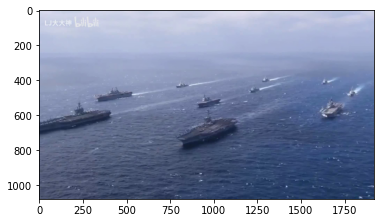

In [10]:
%matplotlib inline

plt.imshow(frame[:,:, ::-1]) # transfer to rgb
plt.show()

In [11]:
img = cv2.imread("demo/demo.jpg", 1)

In [12]:
img.shape

(427, 640, 3)

In [13]:
result = inference_detector(model, img)
ans = model.show_result(img, result, score_thr=0.3)

/workdir/mmdet/datasets/utils.py:70: UserWarning: "ImageToTensor" pipeline is replaced by "DefaultFormatBundle" for batch inference. It is recommended to manually replace it in the test data pipeline in your config file.
  'data pipeline in your config file.', UserWarning)


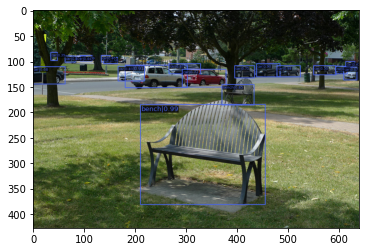

In [14]:
%matplotlib inline

plt.imshow(ans[:,:, ::-1]) # transfer to rgb
plt.show()

In [15]:
cv2.imwrite('demo/result.jpg', ans)

True

## 视频目标检测

In [2]:
import cv2

video_reader = mmcv.VideoReader('demo/boats.mp4')
video_writer = cv2.VideoWriter(
    'outputs/result.mp4', 
    cv2.VideoWriter_fourcc(*'mp4v'), 
    video_reader.fps, 
    (video_reader.width, video_reader.height))
score_thr  = 0.3

for frame in mmcv.track_iter_progress(video_reader):
    result = inference_detector(model, frame)
    frame = model.show_result(frame, result, score_thr=score_thr)
    video_writer.write(frame)

video_writer.release()

[                                                  ] 0/211, elapsed: 0s, ETA:

/workdir/mmdet/datasets/utils.py:70: UserWarning: "ImageToTensor" pipeline is replaced by "DefaultFormatBundle" for batch inference. It is recommended to manually replace it in the test data pipeline in your config file.
  'data pipeline in your config file.', UserWarning)


[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 211/211, 3.8 task/s, elapsed: 56s, ETA:     0s


In [17]:
import cv2

video_reader = mmcv.VideoReader('demo/airplane/multiple_1.avi')
video_writer = cv2.VideoWriter(
    'demo/airplane/multiple_1_result.mp4', 
    cv2.VideoWriter_fourcc(*'mp4v'), 
    video_reader.fps, 
    (video_reader.width, video_reader.height))
score_thr  = 0.3

for frame in mmcv.track_iter_progress(video_reader):
    result = inference_detector(model, frame)
    frame = model.show_result(frame, result, score_thr=score_thr)
    video_writer.write(frame)

video_writer.release()

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 377/377, 12.5 task/s, elapsed: 30s, ETA:     0s
